## 不動産仲介会社のモデリングケース

<H2>1. 必要なライブラリを読み込む</H2>

In [1]:
from __future__ import print_function
%matplotlib inline

import copy

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#今日のメインライブラリ
matplotlib.style.use('ggplot')

<H2>2. データの読み込み</H2>


In [2]:
dataset = pd.read_csv('dataset/kc_house_data.csv')

In [3]:
#年月日
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print('Number of Rows: %i   Number of Columns: %i' % dataset.shape)

Number of Rows: 21613   Number of Columns: 21


<h2>3. 要約統計量を出力する</h2>

In [5]:
dataset.describe()
#std 標準偏差
#今回のidは意味なし

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<H2>4. Feature Engnieeringの際に有用なPandasの使い方</H2>

<h3>カラム間の演算</h3>

In [6]:
#このワーニングは気にしない　ヒスイ
dataset['sqft_total'] = dataset['sqft_above'] + dataset['sqft_basement']
dataset.ix[0:9][['id', 'sqft_above', 'sqft_basement', 'sqft_total']]

C:\Users\yukio.Panda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,id,sqft_above,sqft_basement,sqft_total
0,7129300520,1180,0,1180
1,6414100192,2170,400,2570
2,5631500400,770,0,770
3,2487200875,1050,910,1960
4,1954400510,1680,0,1680
5,7237550310,3890,1530,5420
6,1321400060,1715,0,1715
7,2008000270,1060,0,1060
8,2414600126,1050,730,1780
9,3793500160,1890,0,1890


<h3>カラムに関数を適用する</h3>

In [7]:
#年と月を取り出す関数
def date_str2year(x):
    # 最初の４文字を取り出せば、正数、年出返す
    return int(x[:4])

def date_str2month(x):
    # 5文字から6文字目を取り出せば、月になる、7文字目は未満でありパイソンは0始まりなので
    return int(x[4:6])

In [8]:
#　dateに2yearをapplyする　for loopは回さない
#　.apply()、dateの中に自分で作ったdate_str2yearを入れるという関数、下の行も同じく
#　Pycharm自分のパイソンファイルと保存できる！
#　0:9は0～9行目までという意味
dataset['date_year'] = dataset['date'].apply(date_str2year)
dataset['date_month'] = dataset['date'].apply(date_str2month)
dataset.ix[0:9][['id','date', 'date_year', 'date_month']]

,id,date,date_year,date_month
0,7129300520,20141013T000000,2014,10
1,6414100192,20141209T000000,2014,12
2,5631500400,20150225T000000,2015,2
3,2487200875,20141209T000000,2014,12
4,1954400510,20150218T000000,2015,2
5,7237550310,20140512T000000,2014,5
6,1321400060,20140627T000000,2014,6
7,2008000270,20150115T000000,2015,1
8,2414600126,20150415T000000,2015,4
9,3793500160,20150312T000000,2015,3


<h3>ダミー変数を作る</h3>

In [9]:
#view カテゴリカル意味のない変数に意味のある変数に変える
#この場合01234のviewをダミー変数にする必要がある
dataset = pd.get_dummies(data=dataset, columns=['view'])

In [10]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_total', 'date_year', 'date_month',
       'view_0', 'view_1', 'view_2', 'view_3', 'view_4'],
      dtype='object')

In [11]:
#ここまでがデータを作る作業である　データをもらったときはデータの定義書も必ずもらう
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,...,1340,5650,1180,2014,10,1,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,...,1690,7639,2570,2014,12,1,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,...,2720,8062,770,2015,2,1,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,...,1360,5000,1960,2014,12,1,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,...,1800,7503,1680,2015,2,1,0,0,0,0


<h2>5. 分布の確認(データ可視化入門）</h2>

<h3>ヒストグラム</h3>

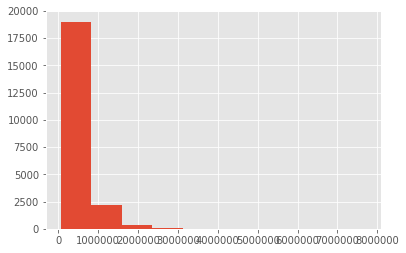

In [12]:
dataset['price'].hist()
# 以下でも同じ
# dataset.price.hist()

<p>logスケールにしたい場合は、Numpyのlog関数を使って行う</p>

(array([  6.30000000e+01,   5.33000000e+02,   3.97700000e+03,
          7.18300000e+03,   6.34500000e+03,   2.54100000e+03,
          7.33000000e+02,   1.93000000e+02,   3.80000000e+01,
          7.00000000e+00]),
 array([ 11.22524339,  11.68839214,  12.15154089,  12.61468964,
         13.07783839,  13.54098714,  14.00413589,  14.46728464,
         14.93043339,  15.39358214,  15.85673089]),
 <a list of 10 Patch objects>)

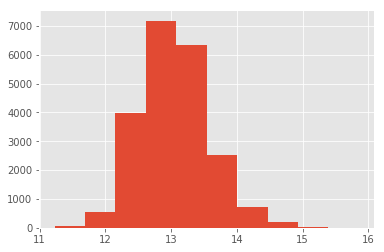

In [13]:
#正規分布ぽいヒストグラムに直すことができる　予測精度が少し上がる　log対数を使う
plt.hist(np.log(dataset['price']))

<h3>散布図</h3>

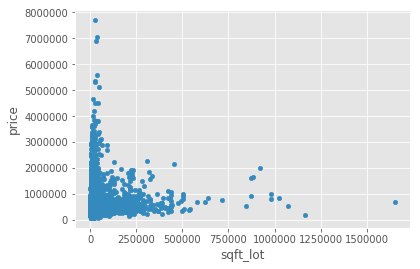

In [14]:
#グラフの読み方、理解？？？
dataset.plot(kind='scatter', x='sqft_lot', y='price')

<h3>Group Byで集計して棒グラフ</h3>

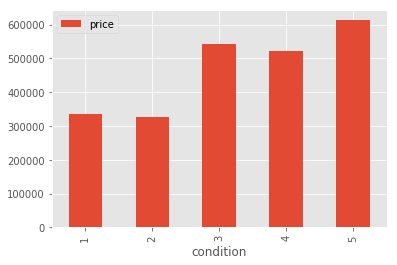

In [15]:
#プライスはどういうものか見たほうがよい　平均だけだと　でないと見誤ってします
price_by_condition = \
 dataset.groupby('condition').aggregate({'price': np.mean}).reset_index()
price_by_condition.plot.bar(x='condition')

<h3>箱ヒゲ図(Boxplot) </h3>

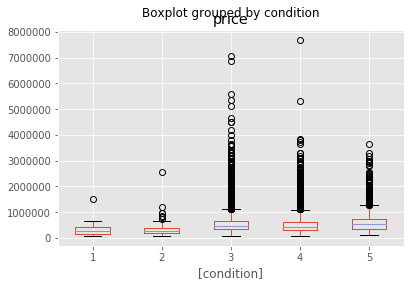

In [16]:
#査定する人によって価格が変わる　ばらつく　価格決めは難しい　※ここまでは可視化の部分
dataset[['condition', 'price']].boxplot(by='condition')

<h2>6. 欠損の確認とその対応</h2>

In [17]:
#今回は全て０なので欠損値なし　NULLかどうか　欠損値は埋める　ビッグデータの時は柔軟に対応　列の平均値　中央値　ゼロ　予測値でうめる　
#とにかくなんで欠損値か聞く
#システマチックにでてくる欠損値は特徴量になりえる　工場など
col_names = dataset.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(dataset[col_name]))
    print(col_name, '; # of missing record: ', missing_num)

id ; # of missing record:  0
date ; # of missing record:  0
price ; # of missing record:  0
bedrooms ; # of missing record:  0
bathrooms ; # of missing record:  0
sqft_living ; # of missing record:  0
sqft_lot ; # of missing record:  0
floors ; # of missing record:  0
waterfront ; # of missing record:  0
condition ; # of missing record:  0
grade ; # of missing record:  0
sqft_above ; # of missing record:  0
sqft_basement ; # of missing record:  0
yr_built ; # of missing record:  0
yr_renovated ; # of missing record:  0
zipcode ; # of missing record:  0
lat ; # of missing record:  0
long ; # of missing record:  0
sqft_living15 ; # of missing record:  0
sqft_lot15 ; # of missing record:  0
sqft_total ; # of missing record:  0
date_year ; # of missing record:  0
date_month ; # of missing record:  0
view_0 ; # of missing record:  0
view_1 ; # of missing record:  0
view_2 ; # of missing record:  0
view_3 ; # of missing record:  0
view_4 ; # of missing record:  0


### applyを使って欠損を確認する方法</p>

In [18]:
missing_check = dataset.copy()
missing_check = missing_check.apply(pd.isnull, axis=1)
missing_check.apply(sum, axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_total       0
date_year        0
date_month       0
view_0           0
view_1           0
view_2           0
view_3           0
view_4           0
dtype: int64

<h2>7. 特徴量の作成 Feature Engineering</h2>

In [19]:
#近所に比べての場合近所の価格で割ってやる　分母がゼロを防ぐために0.001を入れる　\開業　逆/でもいい
#近所１５件のリビングの平均　その家は相対的にどれくらい大きいのか
#自分で名前つけ
dataset['sqft_living_div_sqft_living15'] = \
dataset['sqft_living'] / (dataset['sqft_living15'] + 0.001)

In [20]:
# Enter your code here　３平方の定理で三好先生の例
dataset['center_from_dis']=np.sqrt((dataset['lat']-(47.6092431))**2+(dataset['long']-(-122.338924))**2)

In [21]:
dataset['house_shape']=dataset['sqft_above']/(dataset['floors']+0.001)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,date_year,date_month,view_0,view_1,view_2,view_3,view_4,sqft_living_div_sqft_living15,center_from_dis,house_shape
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,...,2014,10,1,0,0,0,0,0.880596,0.127765,1178.821179
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,...,2014,12,1,0,0,0,0,1.520709,0.113519,1084.457771
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,...,2015,2,1,0,0,0,0,0.283088,0.166651,769.230769
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,...,2014,12,1,0,0,0,0,1.441175,0.103665,1048.951049
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,...,2015,2,1,0,0,0,0,0.933333,0.294021,1678.321678


<h2>8. Scikit Learnを用いた予測モデルの構築</h2>

<p>機械学習モデルを使ってみる</p>
<p>ここでは以下の機械学習アルゴリズムを試す</p>
<li>線形回帰モデル</li>
<li>決定木</li>
<li>ランダムフォレスト</li>
<p>モデル評価はRMSE使用</p>

In [22]:
#サイキットラン　 regressionを使用
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

C:\Users\yukio.Panda\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\yukio.Panda\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<h3>ターゲット変数(被説明変数)と特徴量(説明変数)を指定してsklearnに渡せるように準備する</h3>

In [23]:
#いらない変数はぬく
target_col = 'price'
exclude_cols = ['price', 'id', 'date']
feature_cols = [col for col in dataset.columns if col not in exclude_cols]

In [24]:
feature_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_total',
 'date_year',
 'date_month',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'sqft_living_div_sqft_living15',
 'center_from_dis',
 'house_shape']

## 説明変数（特徴量）

In [25]:
dataset[feature_cols].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,date_year,date_month,view_0,view_1,view_2,view_3,view_4,sqft_living_div_sqft_living15,center_from_dis,house_shape
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,...,2014,10,1,0,0,0,0,0.880596,0.127765,1178.821179
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,...,2014,12,1,0,0,0,0,1.520709,0.113519,1084.457771
2,2,1.00,770,10000,1.0,0,3,6,770,0,...,2015,2,1,0,0,0,0,0.283088,0.166651,769.230769
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,...,2014,12,1,0,0,0,0,1.441175,0.103665,1048.951049
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,...,2015,2,1,0,0,0,0,0.933333,0.294021,1678.321678


## 被説明変数（ターゲット変数）

In [26]:
dataset[target_col].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [27]:
#目的変数y1郡、説明関数x多郡でも可
y = np.array(dataset[target_col])
X = np.array(dataset[feature_cols])

NumPyの配列に直した特徴量の行列

In [28]:
#ターゲト変数
X

array([[  3.00000000e+00,   1.00000000e+00,   1.18000000e+03, ...,
          8.80596358e-01,   1.27765376e-01,   1.17882118e+03],
       [  3.00000000e+00,   2.25000000e+00,   2.57000000e+03, ...,
          1.52070916e+00,   1.13519031e-01,   1.08445777e+03],
       [  2.00000000e+00,   1.00000000e+00,   7.70000000e+02, ...,
          2.83088131e-01,   1.66650808e-01,   7.69230769e+02],
       ..., 
       [  2.00000000e+00,   7.50000000e-01,   1.02000000e+03, ...,
          9.99999020e-01,   4.25939361e-02,   5.09745127e+02],
       [  3.00000000e+00,   2.50000000e+00,   1.60000000e+03, ...,
          1.13475097e+00,   2.80081232e-01,   7.99600200e+02],
       [  2.00000000e+00,   7.50000000e-01,   1.02000000e+03, ...,
          9.99999020e-01,   4.26994058e-02,   5.09745127e+02]])

こちらは被説明変数（ターゲット変数）のベクトル

In [29]:
#説明変数
y

array([ 221900.,  538000.,  180000., ...,  402101.,  400000.,  325000.])

学習データを70%(X_train, y_train)、テストデータを30%(X_test, y_test)に分割

In [30]:
#train学習 test検証　過学習を防ぐ　train dataで学習しtest dataは最後に使う未知のデータとして
#すでにスプリットしてくれている関数がある　seed random
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=1234)

さらに分割した学習データを70%(X_train1, y_train1)と30%(X_train2, y_train2)に分割

In [31]:
X_train1, X_train2, y_train1, y_train2 = \
 train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

<h2>8-1. アルゴリズムの選択</h2>

<h3>線形回帰モデル</h3>

In [32]:
lm = LinearRegression()
lm.fit(X_train1, y_train1)
y_pred2 = lm.predict(X_train2)
lm_mse = mean_squared_error(y_train2, y_pred2)
print('LinerRegression RMSE: ', np.sqrt(lm_mse))
#２０万ぐらいの誤差がでている

LinerRegression RMSE:  192713.786951


回帰係数は以下のようにとり出せる

In [33]:
coef_pd = pd.DataFrame(lm.coef_, columns=['coef'], index=feature_cols)
coef_pd

,coef
bedrooms,-2.809558e+04
bathrooms,3.790152e+04
sqft_living,1.157339e+02
sqft_lot,1.632405e-01
floors,-2.573173e+04
waterfront,5.290718e+05
condition,3.396779e+04
grade,9.456004e+04
sqft_above,8.613385e+01
sqft_basement,2.960014e+01


回帰係数を可視化すると以下のようになりる。しかし、これで変数の重要度はわかりません。なぜだかわかりますか？
元の単位、円やドルに引っ張られ回帰係数のスケールが変わる、標準偏差」X回帰係数であれば単位自体の影響はコールできているので変数の重要度をみれる

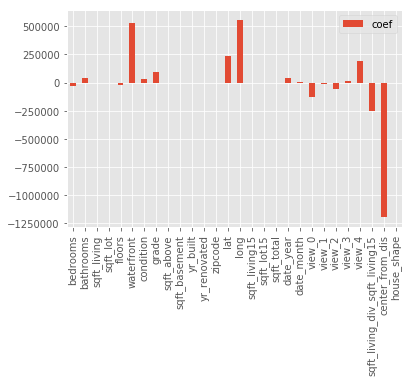

In [34]:
coef_pd.plot(kind='bar')

<h3>決定木（回帰木）</h3>

In [35]:
#左側特徴量、右側ターゲット変数
#決定着の値は小さいので線形回帰より良い
#機械学習はこの数行でできたしまうので前処理の工程が非常に重要
#KPI、特徴量、特徴量選択など
dt=DecisionTreeRegressor()
dt.fit(X_train1, y_train1)#ここで学習は終わり
y_pred2=dt.predict(X_train2)
dt_mse = mean_squared_error(y_train2, y_pred2)
print( 'DecisionTree RMSE:', np.sqrt(dt_mse))

DecisionTree RMSE: 190545.711391


<h3>ランダムフォレスト</h3>

In [36]:
#最初の一行だけ違う　価格を予測するのはこちらのほうがいい
#さらに小さい数値が出た、よってランフォレがいいのでこれで使ってみる
#残差の２乗誤差の平均のルート
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1, y_train1)
y_pred2 = rf.predict(X_train2)
rf_mse = mean_squared_error(y_train2, y_pred2)
print('Random Forest RMSE: ', np.sqrt(rf_mse))

Random Forest RMSE:  144437.314353


<h2>8-2. 変数選択</h2>
<h3>変数増加法で変数選択をしてみる</h3>

In [37]:
#誤差の小さい数値で何度も回す　一番誤差が小さいときの組み合わせ
def get_gfs_feature_indices(X, y, features, clf):
    X_train_, X_test_, y_train_, y_test_ = \
        train_test_split(X, y, test_size=0.3, random_state=1234)
    
    #どの特徴量が何列目にあるかを辞書型で保持
    feature_indices = {feature: idx for idx, feature in enumerate(features)}
   
    # 特徴量をユニークにする
    features = set(features)
    
    # 評価（MSE）の初期化
    last_mse = np.inf
    
    #選ばれた特徴量を保存するための空集合を用意
    chosen_features = set()

    while len(chosen_features) < len(features):
        mse_features = []
        
        # 集合は引き算すると差集合
        for feature in (features - chosen_features):
            candidates = chosen_features.union(set([feature]))
            indices = [feature_indices[feature] for feature in candidates]
            clf.fit(X_train_[:, indices], y_train_)
            y_pred = clf.predict(X_test_[:, indices])
            mse = mean_squared_error(y_test_, y_pred)
            mse_features += [(mse, feature)]
        mse, feature = min(mse_features, key= lambda x:x[0])
        
        if mse >= last_mse:
            break
        last_mse = mse
        print('Newly Added Feature: {},\tRMSE Score: {}'.format(feature, np.sqrt(mse)))
        chosen_features.add(feature)
    return [feature_indices[feature] for feature in chosen_features]

In [38]:
#全ての特徴量の組み合わせを試した結果、下の9組が一番よく
#Gradeが一番特徴量が低かった
#gradeを確定して次にどの特徴量が小さいか決めていきzipcodeが次に確定
#この方法は前に確定した特徴量に依存しすべて試していないので最適解では無い！
#精度を上げたいので機械で処理させている、自分で特徴量を選ぶこともできる
selected_feature_index = \
get_gfs_feature_indices(X=X_train, 
                        y=y_train, 
                        features=feature_cols, 
                        clf=RandomForestRegressor(random_state=1234))

Newly Added Feature: grade,	RMSE Score: 262996.65175299
Newly Added Feature: zipcode,	RMSE Score: 196416.49556201926
Newly Added Feature: view_4,	RMSE Score: 180393.89322018728
Newly Added Feature: sqft_total,	RMSE Score: 175237.16201544693
Newly Added Feature: lat,	RMSE Score: 157655.42101254762
Newly Added Feature: yr_built,	RMSE Score: 149416.1961527269
Newly Added Feature: bedrooms,	RMSE Score: 148971.17778295296
Newly Added Feature: view_3,	RMSE Score: 146336.79538020064
Newly Added Feature: view_2,	RMSE Score: 144754.24618394734


<h3>改めて、変数選択後の精度を確認してみましょう</h3>

In [39]:
#上の９個でランダムふぉれすとを行う　こちらの結果が数が小さい
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1[:, selected_feature_index], y_train1)
y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest RMSE: ', np.sqrt(rf_mse))

RandomForest RMSE:  144754.246184


<h2>8-3. クロスバリデーションによるパラメーターのチューニング</h2>

In [40]:
rf = RandomForestRegressor(random_state=1234)

どのようなハイパーパラメーターがあるかは公式ドキュメントでチェックする
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [41]:
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]}

scikit-learnのバージョンを確認する

In [42]:
import sklearn 
sklearn.__version__

'0.19.1'

ハイパーパラメーターのチューニングをGridSearchで行う

In [43]:
#注意: scikit-learnのバージョンが、0.18の場合は、scoring='neg_mean_squared_error'とします
gscv = GridSearchCV(rf, param_grid=params, verbose=1,
                     cv=3, scoring='neg_mean_squared_error')

#注意: scikit-learnのバージョンが、0.17の場合は、scoring='mean_squared_error'とします
#gscv = GridSearchCV(rf, param_grid=params, verbose=1,
#                    cv=3, scoring='mean_squared_error')

In [44]:
#通常数が大きく時間がかかり、いいマシンを持っている会社が処理が速く有利
gscv.fit(X_train1[:, selected_feature_index], y_train1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   40.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=1)

In [45]:
#これを実行すると最適な組み合わせを教えてくれる
#深さ50、木の数100本がよい
gscv.best_params_

{'max_depth': 50, 'n_estimators': 100}

<h3>パラメーターチューニング後のスコアを見てみましょう</h3>

In [46]:
#ここまでが試行錯誤でモデリング、ハイパラを固定して関数に入れることができる
#若干精度が改善している
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
rf.fit(X_train1[:, selected_feature_index ], y_train1)
y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest RMSE: ', np.sqrt(rf_mse))

RandomForest RMSE:  143642.826248


In [47]:
#こういったことを行って、どんどんどんどんモデルの制度を上げていくことが必要

In [48]:
#特徴量を作り、アルゴリズムを選んで選択して、ハイパラのチューニングをしてできあがる。

<h2>8-4. テストデータへ適用して精度を確認する</h2>

<h3>モデルの学習</h3>

In [49]:
#実際テストデータに適応
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
rf.fit(X_train[:, selected_feature_index], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [50]:
#この結果をビジネスでどうするかは別の議論である　回帰は誤差がどのぐらいで評価する
y_pred_on_test = rf.predict(X_test[:, selected_feature_index])
rf_mse = mean_squared_error(y_test, y_pred_on_test)
print('RandomForest RMSE: ', np.sqrt(rf_mse))

RandomForest RMSE:  150997.02047


In [51]:
#結果、プラスマイナスで150993でこれを可視化すると下記のようになる

<h2>8-5. 誤差の様子を可視化して確認</h2>

<h3>予測数値と実際の値の散布図</h3>

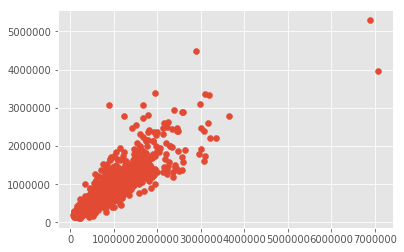

In [52]:
#縦軸に予測値
#外れ値は元データに戻り確認する必要がある、足りない特徴量や外れ値かもしれない
#例：事故物件か何らかの理由のためなど特殊事情があるので外してあげたりして、だんだん精度を上げていく
#下のプロットはよいが上が広がっているので全自動で予測はよくない
#よって低価格は自動で、高価格は後日係員から連絡させる方法がよい
plt.scatter(y_test, y_pred_on_test)

<h3>誤差のヒストグラム</h3>

Mean:  -0.0329168806297
Std:  0.217809199245


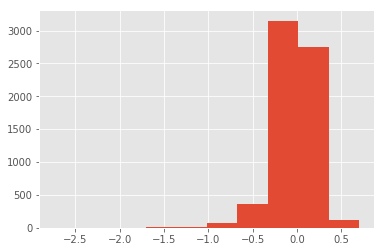

In [53]:
#RMSEは標準偏差なのでヒストグラムでも確認したりしてモデルの精度を上げていく
#そして、データの準備に戻り、一連の流れをぐるぐる行っていく
error_rate = (y_test - y_pred_on_test) / y_test
plt.hist(error_rate)
print('Mean: ', np.mean(error_rate))
print('Std: ', np.std(error_rate))

In [247]:
#仮にこれでOKならばABテストを行って、あるユーザーに新サービスを見せてみて
#問い合わせやログインが増えているなど確認し十分増えているならシステムを作り課題克服へ実行していく